In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("drug200.csv")
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [4]:
categorical = ["Sex", "BP", "Cholesterol", "Drug"]

In [5]:
for i in categorical : 
    print(i, " : ", df[i].unique())

Sex  :  ['F' 'M']
BP  :  ['HIGH' 'LOW' 'NORMAL']
Cholesterol  :  ['HIGH' 'NORMAL']
Drug  :  ['DrugY' 'drugC' 'drugX' 'drugA' 'drugB']


In [6]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for i in categorical :
    print(df[i].unique())
    df[i] = label_encoder.fit_transform(df[i])
    print(df[i].unique())

['F' 'M']
[0 1]
['HIGH' 'LOW' 'NORMAL']
[0 1 2]
['HIGH' 'NORMAL']
[0 1]
['DrugY' 'drugC' 'drugX' 'drugA' 'drugB']
[0 3 4 1 2]


In [7]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0
...,...,...,...,...,...,...
195,56,0,1,0,11.567,3
196,16,1,1,0,12.006,3
197,52,1,2,0,9.894,4
198,23,1,2,1,14.020,4


In [8]:
x = df.drop('Drug', axis=1)
y = df['Drug']

In [9]:
#Splitting the dataset into training and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.25, random_state=0)

In [10]:
#Pembuatan model
from sklearn.naive_bayes import GaussianNB 
model = GaussianNB() 
model.fit(x_train, y_train) 

GaussianNB()

In [11]:
predicted = model.predict(x_test)
predicted

array([3, 4, 0, 0, 0, 4, 4, 4, 3, 4, 1, 0, 0, 0, 2, 3, 0, 0, 4, 1, 1, 4,
       4, 4, 0, 0, 0, 0, 0, 4, 4, 3, 1, 4, 0, 0, 4, 3, 1, 4, 0, 1, 0, 0,
       0, 4, 4, 0, 1, 2])

In [12]:
from sklearn import metrics
print("Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, predicted) * 100)

Naive Bayes model accuracy(in %): 86.0


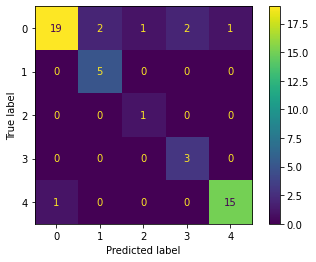

In [13]:
import matplotlib.pyplot as plt
cm = metrics.confusion_matrix(y_test, predicted)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

In [14]:
df['Drug'].unique()

array([0, 3, 4, 1, 2])